In [1]:
import numpy as np
import gym
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output

In [2]:
env = gym.make("FrozenLake-v1", is_slippery=False)
n_observations = env.observation_space.n
n_actions = env.action_space.n

#Initialize the Q-table to 0
Q_table = np.zeros((n_observations,n_actions))

#number of episode we will run
n_episodes = 10000

#maximum of iteration per episode
max_iter_episode = 100

#initialize the exploration probability to 1
exploration_proba = 1

#exploartion decreasing decay for exponential decreasing
exploration_decreasing_decay = 0.001

# minimum of exploration proba
min_exploration_proba = 0.01

#discounted factor
gamma = 0.98

#learning rate
lr = 0.006

In [3]:
rewards_per_episode = list()
times_per_episode = list()
#we iterate over episodes
for e in range(n_episodes):
    
    if(e%500==0):
        print('episode = ', e)
    #we initialize the first state of the episode
    current_state = env.reset()
    done = False
    
    #contains the sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    start=time.time()
    for i in range(max_iter_episode):
        # we sample a float from a uniform distribution between 0 and 1
        # if the sampled flaot is less than the exploration probability
        #    the agent explore the environment by choosing a random action
        # else
        #    he exploit his knowledge using the bellman equation 
        if np.random.uniform(0,1) < exploration_proba:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[current_state,:])
        
        # The environment runs the choen action and returns the next state,
        # the reward for that action and true if the epiosed is ended.
        next_state, reward, done, _ = env.step(action)
        
        # We update our Q-table using the Q-learning iteration equation
        Q_table[current_state, action] = (1-lr)*Q_table[current_state, action] + lr*(reward + gamma*max(Q_table[next_state,:]))
        total_episode_reward = total_episode_reward + reward
        
        # If the episode is finished, we leave the for loop
        if done:
            break
        current_state = next_state
    # We update our exploration probability using exponential decay formula 
    exploration_proba = max(min_exploration_proba,np.exp(-exploration_decreasing_decay*e))
    end=time.time()    
    ti=end-start
    times_per_episode.append(ti)
    rewards_per_episode.append(total_episode_reward)

episode =  0
episode =  500
episode =  1000
episode =  1500
episode =  2000
episode =  2500
episode =  3000
episode =  3500
episode =  4000
episode =  4500
episode =  5000
episode =  5500
episode =  6000
episode =  6500
episode =  7000
episode =  7500
episode =  8000
episode =  8500
episode =  9000
episode =  9500


In [4]:
Q_table

array([[2.77147327e-01, 9.03920797e-01, 1.32139563e-02, 2.82601071e-01],
       [1.39668099e-01, 0.00000000e+00, 1.51541177e-02, 1.57373631e-04],
       [2.11534102e-04, 9.38232903e-02, 8.93335561e-06, 1.88434695e-03],
       [7.71975471e-04, 0.00000000e+00, 3.42614828e-08, 6.54227081e-07],
       [3.29002852e-01, 9.22368160e-01, 0.00000000e+00, 2.37904615e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.42219425e-01, 0.00000000e+00, 1.50129916e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.07410481e-01, 0.00000000e+00, 9.41192000e-01, 2.76311246e-01],
       [2.98565476e-01, 2.77497004e-01, 9.60400000e-01, 0.00000000e+00],
       [3.37567801e-01, 9.80000000e-01, 0.00000000e+00, 1.71942751e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.53499255e-02, 7.34144031e

In [5]:
#LEFT = 0
#DOWN = 1
#RIGHT = 2
#UP = 3
# Policy
def act_names(x):
    dt = {0:'left', 1:'down', 2:'right', 3:'up'}
    return dt[x]
act_np = np.vectorize(act_names)
act = np.argmax(Q_table, axis=1)
act = act_np(act)
act = act.reshape(4,4)
print("Policy:\n", act)

Policy:
 [['down' 'left' 'down' 'left']
 ['down' 'left' 'down' 'left']
 ['right' 'right' 'down' 'left']
 ['left' 'right' 'right' 'left']]


In [6]:
print("Mean reward per thousand episodes")
mean_episode_rewards=[]
mean_episode_times=[]
episodes=np.arange(20,10000+20,20).astype('int')
for i in range(500):
    mean_reward=np.mean(rewards_per_episode[20*i:20*(i+1)])
    print((i+1)*20,": mean espiode reward: ",mean_reward)
    mean_episode_rewards.append(mean_reward)
    mean_time=np.mean(times_per_episode[20*i:20*(i+1)])
    mean_episode_times.append(mean_time)
print("\n\n")

Mean reward per thousand episodes
20 : mean espiode reward:  0.05
40 : mean espiode reward:  0.0
60 : mean espiode reward:  0.0
80 : mean espiode reward:  0.1
100 : mean espiode reward:  0.0
120 : mean espiode reward:  0.05
140 : mean espiode reward:  0.0
160 : mean espiode reward:  0.1
180 : mean espiode reward:  0.05
200 : mean espiode reward:  0.1
220 : mean espiode reward:  0.15
240 : mean espiode reward:  0.1
260 : mean espiode reward:  0.1
280 : mean espiode reward:  0.05
300 : mean espiode reward:  0.15
320 : mean espiode reward:  0.05
340 : mean espiode reward:  0.1
360 : mean espiode reward:  0.1
380 : mean espiode reward:  0.05
400 : mean espiode reward:  0.25
420 : mean espiode reward:  0.3
440 : mean espiode reward:  0.35
460 : mean espiode reward:  0.2
480 : mean espiode reward:  0.2
500 : mean espiode reward:  0.35
520 : mean espiode reward:  0.45
540 : mean espiode reward:  0.35
560 : mean espiode reward:  0.25
580 : mean espiode reward:  0.25
600 : mean espiode reward: 

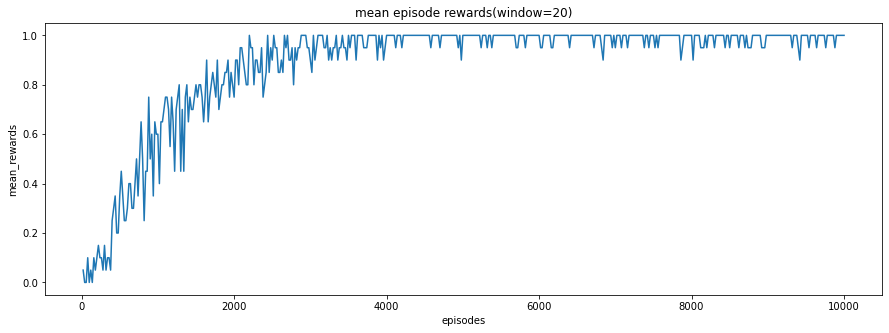

In [7]:
fig=plt.figure(figsize=[15,5])
plt.plot(episodes,mean_episode_rewards)
plt.title('mean episode rewards(window=20)')
plt.xlabel('episodes')
plt.ylabel('mean_rewards')
plt.show()

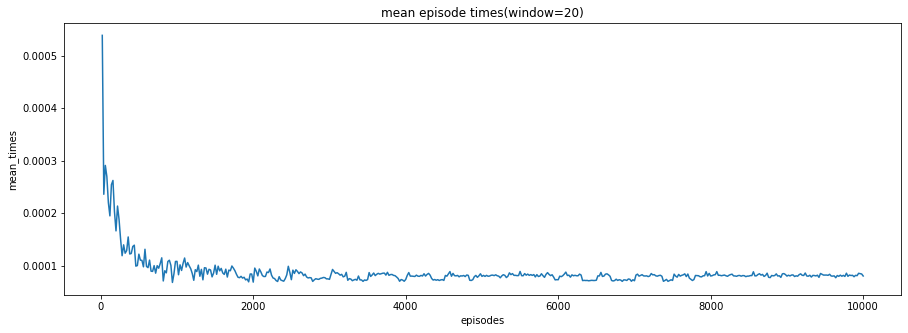

In [8]:
fig=plt.figure(figsize=[15,5])
plt.plot(episodes,mean_episode_times)
plt.title('mean episode times(window=20)')
plt.xlabel('episodes')
plt.ylabel('mean_times')
plt.show()